Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/My Drive/MA440')
!pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/MA440


In [ ]:
train = pd.read_csv('/content/gdrive/My Drive/MA440/sonar_train.csv')
test = pd.read_csv('/content/gdrive/My Drive/MA440/sonar_test.csv')

In [ ]:
xtrain = train.iloc[:,0:60]
ytrain = train.iloc[:,60]

xtest = test.iloc[:,0:60]
ytest = test.iloc[:,60]

In [ ]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(log_reg.intercept_)
print(log_reg.coef_)

[2.3964746]
[[-0.15170403 -0.16013462 -0.12848921 -0.22371585 -0.09528248  0.21682558
   0.07876781  0.08448239 -0.53698784 -0.83980811 -1.0566752  -1.00291646
  -0.55137199  0.09313552  0.07830213  0.2905289   0.38290023  0.49465539
  -0.18790641 -0.46012991 -0.73491823 -0.74257368 -0.72575384 -0.26605657
   0.28049429  0.1180818   0.11190708 -0.36872545 -0.20704984 -0.0807308
   1.01090624 -0.21878213 -0.04733517  0.44654994  0.66343664  1.20318158
   0.42910989 -0.78799364 -0.50975843  0.59270569  0.01125272 -0.84149454
  -0.65865132 -0.78728166 -1.34103351 -1.24228873 -0.83443359 -0.64784198
  -0.40707462 -0.06034785 -0.12017045 -0.10819465 -0.01888103 -0.07383091
  -0.01403241 -0.01626494  0.02254274 -0.01737549 -0.01467545  0.00165272]]


In [ ]:
pred_prob = pd.DataFrame(log_reg.predict_proba(xtest))

pred = log_reg.predict(xtest)
pred_class = pd.DataFrame(pred)
pred_class.columns = ["Prediction"]

test_lab = ytest

In [ ]:
oresult = pd.DataFrame(test_lab)
oresult.columns = ["Original Result"]

In [ ]:
result = pd.concat([pred_prob, pred_class, oresult], axis = 1) 
print(result.head())

          0         1  Prediction  Original Result
0  0.490834  0.509166           1               -1
1  0.264102  0.735898           1               -1
2  0.290626  0.709374           1                1
3  0.159963  0.840037           1                1
4  0.475468  0.524532           1                1


SVM 

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
c = 1
clf = svm.SVC(kernel = 'linear', C = c)
clf.fit (xtrain, ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(clf.score(xtest, ytest))

0.7662337662337663


KNN

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
model = KNeighborsClassifier()
model = model.fit(xtest, ytest)

pred = model.predict(xtrain)

In [ ]:
print(model.score(xtest, ytest))

0.7922077922077922


Decision Tree 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(156.24, 195.696, 'X[10] <= 0.198\ngini = 0.49\nsamples = 77\nvalue = [44, 33]'),
 Text(89.28, 152.208, 'X[30] <= 0.412\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(44.64, 108.72, 'X[46] <= 0.094\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(22.32, 65.232, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(133.92000000000002, 108.72, 'X[43] <= 0.032\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(111.6, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(156.24, 65.232, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(223.2, 152.208, 'X[38] <= 0.102\ngini = 0.335\nsamples = 47\nvalue = [37, 10]'),
 Text(200.88, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(245.52, 108.72, 'X[28] <= 0.356\ngini = 0.21\nsamples = 42\nvalue = [37, 5]'),
 Text(200.88, 65.232, 'X[47] <= 0.052\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(178.56, 21.744, 'gini = 0.0\nsamples = 4\nv

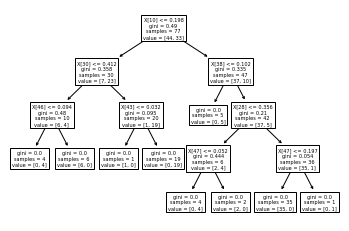

In [ ]:
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(xtest, ytest)

pred_tree = dec_tree.predict(xtrain)

tree.plot_tree(dec_tree)